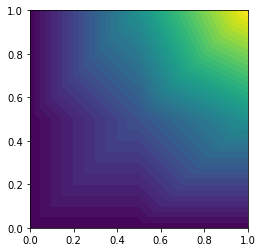

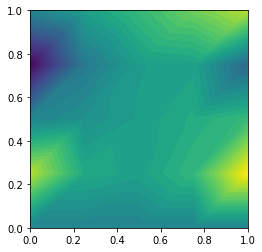

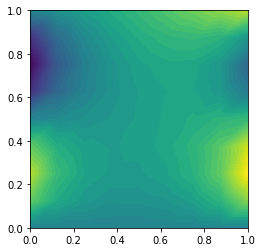

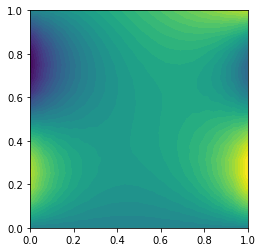

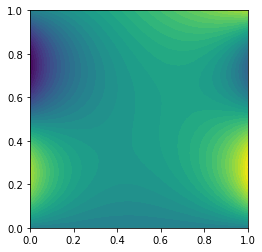

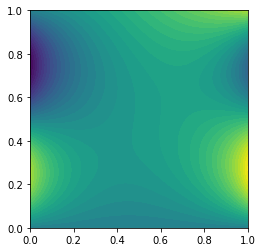

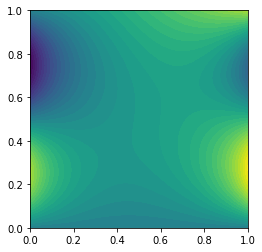

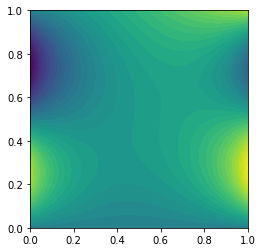

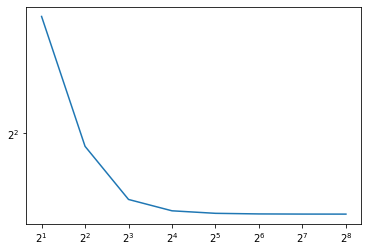

In [38]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
length_arr = 8
N_arr = np.zeros(length_arr)
Err_arr = np.zeros(length_arr)
for i in range(length_arr):
    size = 2**(i + 1)
    N_arr[i] = size
# Create mesh and define function space
    mesh = UnitSquareMesh(size, size)
    V = FunctionSpace(mesh, "P", 1)
# Define boundary condition
    u_D = Expression('x[0]*x[1] + cos(2*pi*x[0])*sin(2*pi*x[1])', degree=5)
    def boundary(x, on_boundary):
        return on_boundary
    bc = DirichletBC(V, u_D, boundary)
    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    #f = Function(V)
    u_D_1 = project(u_D, V)
    f = project(-div(grad(u_D_1)), V)
    a = dot(grad(u), grad(v))*dx
    L = f*v*dx
    # Compute solution
    u = Function(V)
    solve(a == L, u, bc)
    # Plot solution and mesh
    plot(u)
    # Save solution to file in VTK format
    vtkfile = File('poisson/solution.pvd')
    vtkfile << u

    # Compute error in L2 norm
    error_H1 = errornorm(u_D, u, 'H1', degree_rise = 4)
    # Compute maximum error at vertices
    vertex_values_u_D = u_D.compute_vertex_values(mesh)
    vertex_values_u = u.compute_vertex_values(mesh)
    Err_arr[i] = error_H1
# Print errors
    # Hold plot
    
    plt.show()
plt.loglog(N_arr, Err_arr, basex = 2, basey = 2)
plt.show()